### Milestone 5: Final Project

Author: Barbara Jean

Date: 11/18/2023

output: pdf_document

### Predictive Analytics

Identify a business problem to address through predictive analytics. Formulate the problem, identify the right sources of data, analyze data, prescribe actions to make decisions on relevant questions, and analyze the ethical implications of the project. The goal is to select appropriate models and apply the respective methods to enhance data-driven decision making related to the business problem.

#### Proposal Project: Predicting Work Visa in the United States

### Data Pre-processing

In [1]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.feature_selection import chi2 
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [2]:
# Handling warnings as errors 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading dataset
data=pd.read_csv("C:/Users/79bar/dsc630/us_perm_visas.csv")
df_visas=pd.DataFrame(data)
print("The loading of the dataset was successful.\n")

The loading of the dataset was successful.



In [4]:
df_visas.head() # Reading the first records by using the head() method

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


### Exploratory Data Analysis

**Check dimensions of the data set , data types and statistical summary of the variables**

In [7]:
df_visas.shape # Returning a tuple representing the dimensionality of the DataFrame

(374362, 154)

In [8]:
df_visas.size # Returning an int representing the number of elements in this object

57651748

In [9]:
df_visas.info() # Printing a summary of the dataframe, index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: float64(10), object(144)
memory usage: 439.8+ MB


Those output show us that we are working with a set of 374362 and 154 columns. Several of the column variables are encoded as object(144) int and float(10).

In [10]:
df_visas.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

After getting sense ot the data's structure, look at the statistical summary of the variables with describe(). The describe() function could help to identify outlier in the data set.

In [11]:
df_visas.describe() # looking at the statistical summary of the variables with describe()

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089
count,2.390130e+05,238958.000000,83364.000000,137198.000000,70220.000000,147200.000000,133188.000000,4779.000000,1.146470e+05,3.101500e+04
mean,2.309387e+04,1984.208267,2001.345761,2002.633603,4.593876,36.483118,33.103560,32.685081,9.588846e+04,1.232273e+05
std,5.453129e+05,38.470555,91.444715,89.674423,4.838582,23.391668,22.733393,20.593288,1.463822e+05,1.080289e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+00,0.000000e+00
25%,7.300000e+01,1980.000000,2003.000000,2004.000000,3.000000,24.000000,12.000000,12.000000,7.453400e+04,9.700100e+04
50%,1.200000e+03,1996.000000,2006.000000,2007.000000,5.000000,24.000000,24.000000,36.000000,9.064400e+04,1.206000e+05
75%,1.613400e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.100000e+05,1.448419e+05
max,2.635506e+08,2016.000000,2103.000000,2207.000000,96.000000,240.000000,244.000000,240.000000,1.629060e+07,1.328500e+07


As we can see, describe() returned basic statistical details like percentile, mean, std, etc. of the data frame of numeric values only.

 **Clean and organize the data**

In [12]:
df_visas.columns # Showing all columns names in dataframe

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

It appears that the data in the column header is already clean, so we do not need to manipulate the strings by converting them to lowercase, replacing symbols "-" with "_", or removing spaces.

**Drop values**

In [13]:
df_visas['case_status']

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

Case status columns contain four values, as we can see. A note that the 'Certified-Expired' is also a visa 'certified' according to some research(reference). That being said, let us combine 'certified' with the certified_experied value, and drop the withdrawn value. Two values,' certified' and' denied', will be used as the case status.


In [14]:
#Removing 'withdrawn' values
df_visas=df_visas[df_visas.case_status !='Withdrawn']

In [15]:
#Combining certified-expired and certified values 
df_visas.loc[df_visas.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df_visas.case_status.value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

**Identify missing data**

In [16]:
df_visas.isnull().any() # Checking missing data

add_these_pw_job_title_9089      True
agent_city                       True
agent_firm_name                  True
agent_state                      True
application_type                 True
                                 ... 
wage_offer_to_9089               True
wage_offer_unit_of_pay_9089      True
wage_offered_from_9089           True
wage_offered_to_9089             True
wage_offered_unit_of_pay_9089    True
Length: 154, dtype: bool

In [17]:
df_visas.isnull().sum() # Detecting missing value using interger

add_these_pw_job_title_9089      317031
agent_city                       153452
agent_firm_name                  157646
agent_state                      156544
application_type                 229320
                                  ...  
wage_offer_to_9089               285397
wage_offer_unit_of_pay_9089      108769
wage_offered_from_9089           248582
wage_offered_to_9089             326852
wage_offered_unit_of_pay_9089    289470
Length: 154, dtype: int64

In [18]:
df_visas['case_status'].isnull().sum() # Checking missing value using interger for the target variable 'case_status'

0

In [19]:
# Dropping all empty columns
df_us_visas1 =df_visas.dropna(axis=0, how='all')

df_us_visas1.shape

(356168, 154)

In [20]:
df_us_visas1.isnull().sum()

add_these_pw_job_title_9089      317031
agent_city                       153452
agent_firm_name                  157646
agent_state                      156544
application_type                 229320
                                  ...  
wage_offer_to_9089               285397
wage_offer_unit_of_pay_9089      108769
wage_offered_from_9089           248582
wage_offered_to_9089             326852
wage_offered_unit_of_pay_9089    289470
Length: 154, dtype: int64

**Drop data are 35% missing value**

In [21]:
df_us_visas=df_visas.drop(df_visas.columns[df_visas.isnull().mean()>=0.35], axis=1)

In [22]:
df_us_visas.shape

(356168, 19)

In [23]:
df_us_visas.isnull().sum()

case_status                         0
class_of_admission              21085
country_of_citizenship          19272
decision_date                       0
employer_address_1                 37
employer_city                      10
employer_name                       8
employer_postal_code               33
employer_state                     37
job_info_work_city                 95
job_info_work_state                96
pw_amount_9089                   2203
pw_level_9089                   26585
pw_soc_code                       390
pw_soc_title                     2321
pw_source_name_9089              2087
pw_unit_of_pay_9089              1481
wage_offer_from_9089           107705
wage_offer_unit_of_pay_9089    108769
dtype: int64

**Find duplicates**

The duplicated() method provides a Series with True and False values indicating which rows in the DataFrame are duplicated and which are not.  If all the values in a row are the same, duplicated() by default interprets the row as a whole as a duplicate. It also believes the initial row to be unique, so it will always return False because a duplicate row won't appear until the subsequent occurrence.

In [24]:
df_us_visas.duplicated() # Finding duplicate value in the data 

0         False
1         False
2         False
3         False
4         False
          ...  
374349    False
374350    False
374351    False
374352    False
374353    False
Length: 356168, dtype: bool

As we can see, there are several outliers. The box in our box plot is represented by that thick line close to 0 to 100000 for the Boxplot 'charter_total'. Certain sites show outliers over the box and upper fence.

**Add features year,month, and day in the data**

In [25]:
# Converting timestamp in to time object
df_us_visas['decision_date'] = pd.to_datetime(df_us_visas['decision_date'])

In [26]:
# Add year as a feature from timestamp
df_us_visas['year'] =df_us_visas.decision_date.dt.year
df_us_visas['month'] =df_us_visas.decision_date.dt.month
df_us_visas['day'] =df_us_visas.decision_date.dt.day

df_us_visas.shape

(356168, 22)

### Data visualization

Grouping variables in Seaborn countplot with different attributes
If we use only one data variable instead of two data variables then it means that the axis denotes each of these data variables as an axis.

[Text(0.5, 0, 'Visa application year'),
 Text(0, 0.5, 'Number of Visa applicatons')]

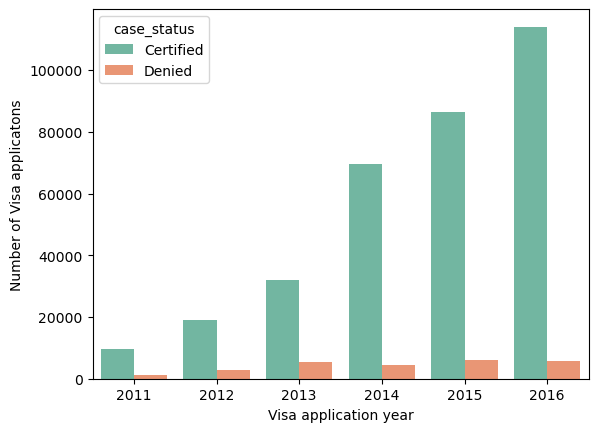

In [27]:
# Counting plot along y axis
fig, ax = plt.subplots()
sns.countplot(x="year", hue = "case_status", palette = "Set2",data = df_us_visas)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons') 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'INDIA'),
  Text(1, 0, 'CHINA'),
  Text(2, 0, 'SOUTH KOREA'),
  Text(3, 0, 'CANADA'),
  Text(4, 0, 'MEXICO'),
  Text(5, 0, 'PHILIPPINES'),
  Text(6, 0, 'UNITED KINGDOM'),
  Text(7, 0, 'TAIWAN'),
  Text(8, 0, 'PAKISTAN'),
  Text(9, 0, 'FRANCE')])

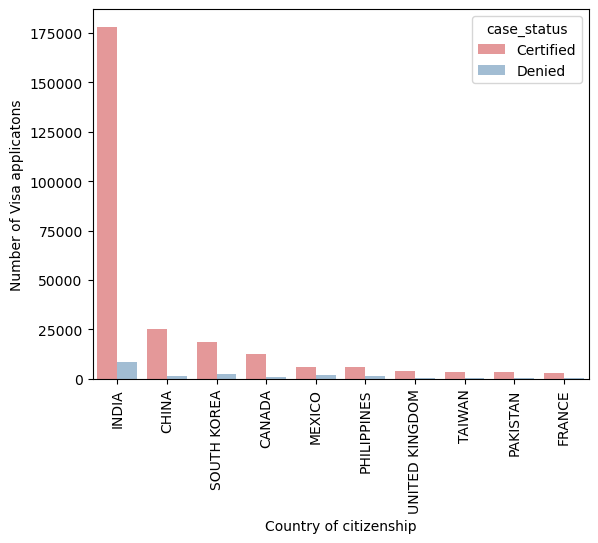

In [28]:
# Counting plot along y axis
fig, ax = plt.subplots()
sns.countplot(x="country_of_citizenship", hue = "case_status", palette = "Set1",data = df_us_visas,
              order=df_us_visas.country_of_citizenship.value_counts().iloc[:10].index,alpha = 0.5)
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applicatons') 
plt.xticks(rotation=90) # setting the labels of x-axis


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Software Developers, Applications'),
  Text(1, 0, 'Computer Systems Analysts'),
  Text(2, 0, 'Software Developers, Systems Software'),
  Text(3, 0, 'Electronics Engineers, Except Computer'),
  Text(4, 0, 'Computer and Information Systems Managers'),
  Text(5, 0, 'Computer Software Engineers, Applications'),
  Text(6, 0, 'Accountants and Auditors'),
  Text(7, 0, 'Network and Computer Systems Administrators*'),
  Text(8, 0, 'Mechanical Engineers'),
  Text(9, 0, 'Meat, Poultry, and Fish Cutters and Trimmers')])

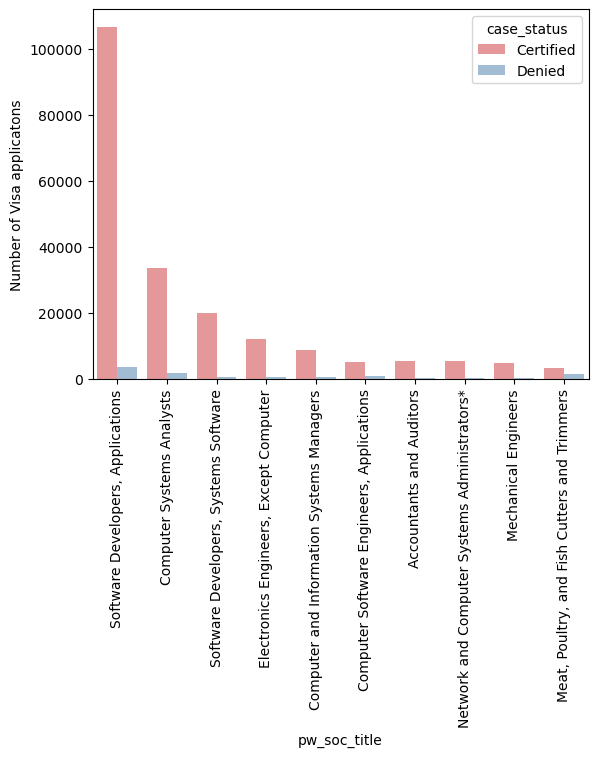

In [29]:
# Counting plot along y axis
fig, ax = plt.subplots()
sns.countplot(x="pw_soc_title", hue = "case_status", palette = "Set1",data = df_us_visas,
              order=df_us_visas.pw_soc_title.value_counts().iloc[:10].index,alpha = 0.5)
ax.set(xlabel='pw_soc_title', ylabel='Number of Visa applicatons') 
plt.xticks(rotation=90) # setting the labels of x-axis


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION'),
  Text(1, 0, 'MICROSOFT CORPORATION'),
  Text(2, 0, 'INTEL CORPORATION'),
  Text(3, 0, 'GOOGLE INC.'),
  Text(4, 0, 'AMAZON CORPORATE LLC'),
  Text(5, 0, 'CISCO SYSTEMS, INC.'),
  Text(6, 0, 'APPLE INC.'),
  Text(7, 0, 'ORACLE AMERICA, INC.'),
  Text(8, 0, 'INFOSYS LTD.'),
  Text(9, 0, 'DELOITTE CONSULTING LLP')])

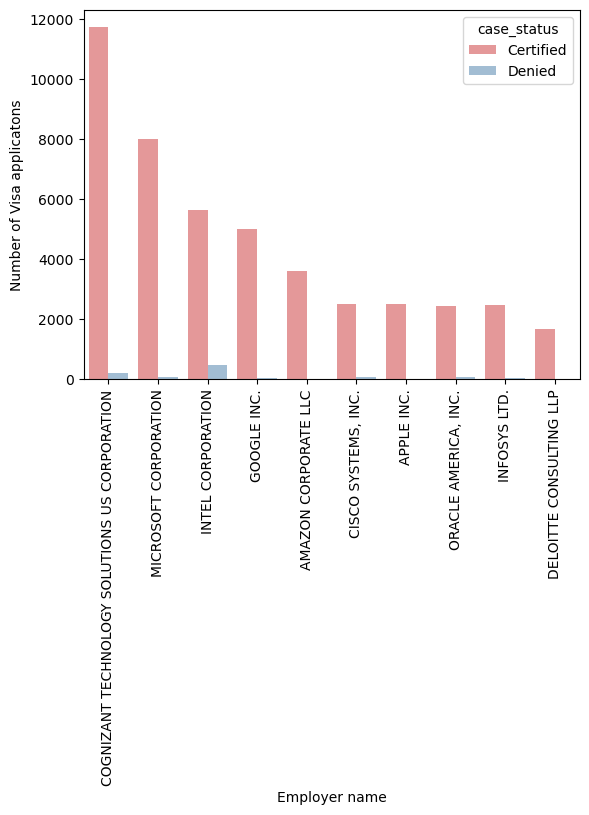

In [30]:
# Counting plot along y axis
fig, ax = plt.subplots()
#fig.set_size_inches(8, 6)
sns.countplot(x="employer_name", hue = "case_status", palette = "Set1",data = df_us_visas,
              order=df_us_visas.employer_name.value_counts().iloc[:10].index,alpha = 0.5)
ax.set(xlabel='Employer name', ylabel='Number of Visa applicatons') 
plt.xticks(rotation=90) # setting the labels of x-axis


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'H-1B'),
  Text(1, 0, 'L-1'),
  Text(2, 0, 'F-1'),
  Text(3, 0, 'Not in USA'),
  Text(4, 0, 'TN'),
  Text(5, 0, 'E-2'),
  Text(6, 0, 'B-2'),
  Text(7, 0, 'Parolee'),
  Text(8, 0, 'EWI'),
  Text(9, 0, 'J-1')])

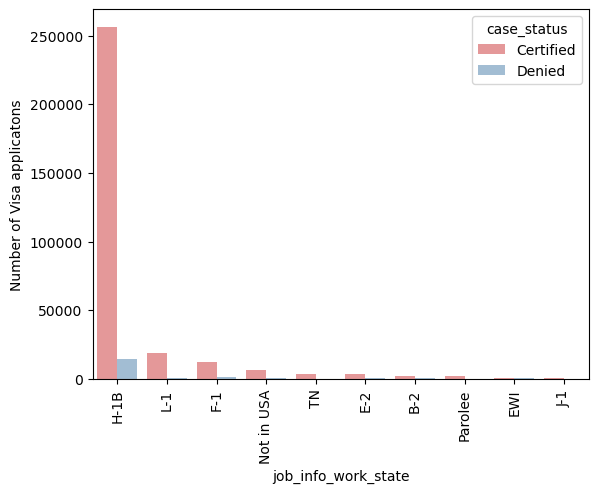

In [31]:
# Counting plot along y axis
fig, ax = plt.subplots()
sns.countplot(x="class_of_admission", hue = "case_status", palette = "Set1",data = df_us_visas,
              order=df_us_visas.class_of_admission.value_counts().iloc[:10].index,alpha = 0.5)
ax.set(xlabel='job_info_work_state', ylabel='Number of Visa applicatons') 
plt.xticks(rotation=90) # setting the labels of x-axis


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NEW YORK'),
  Text(1, 0, 'COLLEGE STATION'),
  Text(2, 0, 'SANTA CLARA'),
  Text(3, 0, 'SAN JOSE'),
  Text(4, 0, 'REDMOND'),
  Text(5, 0, 'MOUNTAIN VIEW'),
  Text(6, 0, 'HOUSTON'),
  Text(7, 0, 'SUNNYVALE'),
  Text(8, 0, 'SAN FRANCISCO'),
  Text(9, 0, 'PLANO')])

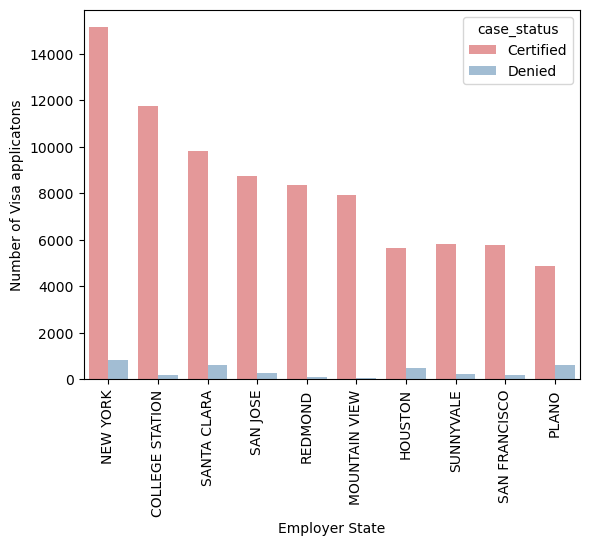

In [33]:
# Counting plot along y axis
fig, ax = plt.subplots()
sns.countplot(x="employer_city", hue = "case_status", palette = "Set1",data = df_us_visas,
              order=df_us_visas.employer_city.value_counts().iloc[:10].index,alpha = 0.5)
ax.set(xlabel='Employer State', ylabel='Number of Visa applicatons') 
plt.xticks(rotation=90) # setting the labels of x-axis


### Data Preparation

In [34]:
# Dropping unecessary variables
df_us_visas_drop= df_us_visas.drop(['decision_date','employer_address_1'], axis=1)

In [35]:
for col in df_us_visas_drop.columns[:]:
    print(col,':',len(df_us_visas_drop[col].unique()),'labels')

case_status : 2 labels
class_of_admission : 58 labels
country_of_citizenship : 202 labels
employer_city : 8325 labels
employer_name : 70387 labels
employer_postal_code : 15229 labels
employer_state : 114 labels
job_info_work_city : 9298 labels
job_info_work_state : 114 labels
pw_amount_9089 : 34929 labels
pw_level_9089 : 5 labels
pw_soc_code : 1359 labels
pw_soc_title : 899 labels
pw_source_name_9089 : 7 labels
pw_unit_of_pay_9089 : 11 labels
wage_offer_from_9089 : 38116 labels
wage_offer_unit_of_pay_9089 : 11 labels
year : 6 labels
month : 12 labels
day : 31 labels


In [36]:
df_us_visas_drop.head()

,case_status,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_postal_code,employer_state,job_info_work_city,job_info_work_state,pw_amount_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,wage_offer_from_9089,wage_offer_unit_of_pay_9089,year,month,day
0,Certified,J-1,NaN,NEW YORK,NETSOFT USA INC.,10010.0,NY,New York,NY,75629.0,Level II,15-1031.00,"Computer Software Engineers, Applications",OES,yr,75629.0,yr,2012,2,1
1,Denied,B-2,NaN,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,7072.0,NY,New York,NY,37024.0,Level I,47-4041.00,Hazardous Materials Removal Workers,OES,yr,37024.0,yr,2011,12,21
2,Certified,H-1B,NaN,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",23059.0,VA,Lutherville,MD,47923.0,Level I,17-2051.00,Civil Engineers,OES,yr,47923.0,yr,2011,12,1
3,Certified,B-2,NaN,FLUSHING,EBENEZER MISSION CHURCH,11354.0,NY,Flushing,NY,10.97,Level II,43-4071.00,File Clerks,OES,hr,10.97,hr,2011,12,1
4,Certified,L-1,NaN,ALBANY,ALBANY INTERNATIONAL CORP.,12204.0,NY,Albany,NY,94890.0,Level IV,41-9031.00,Sales Engineers,OES,yr,100000.0,yr,2012,1,26


In [37]:
# Converting categorical data into dummy or indicator variables
df_us_visas_dummies =pd.get_dummies(df_us_visas_drop, columns=['case_status'],drop_first=True)
df_us_visas_dummies.head()

,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_postal_code,employer_state,job_info_work_city,job_info_work_state,pw_amount_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_unit_of_pay_9089,wage_offer_from_9089,wage_offer_unit_of_pay_9089,year,month,day,case_status_Denied
0,J-1,NaN,NEW YORK,NETSOFT USA INC.,10010.0,NY,New York,NY,75629.0,Level II,15-1031.00,"Computer Software Engineers, Applications",OES,yr,75629.0,yr,2012,2,1,0
1,B-2,NaN,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,7072.0,NY,New York,NY,37024.0,Level I,47-4041.00,Hazardous Materials Removal Workers,OES,yr,37024.0,yr,2011,12,21,1
2,H-1B,NaN,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",23059.0,VA,Lutherville,MD,47923.0,Level I,17-2051.00,Civil Engineers,OES,yr,47923.0,yr,2011,12,1,0
3,B-2,NaN,FLUSHING,EBENEZER MISSION CHURCH,11354.0,NY,Flushing,NY,10.97,Level II,43-4071.00,File Clerks,OES,hr,10.97,hr,2011,12,1,0
4,L-1,NaN,ALBANY,ALBANY INTERNATIONAL CORP.,12204.0,NY,Albany,NY,94890.0,Level IV,41-9031.00,Sales Engineers,OES,yr,100000.0,yr,2012,1,26,0


In [38]:
# Creating features and target
X=df_us_visas_dummies.drop(['case_status_Denied'],axis=1)
y=df_us_visas_dummies['case_status_Denied']

In [39]:
# Formating all fields as string
X = X.astype(str)
y=y.astype(str)

In [40]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [41]:
# Summarizing train and test
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (238632, 19) (238632,)
Test (117536, 19) (117536,)


We can see that we have 238632 examples for training and 117536 for testing.

To convert categorical variables to integer codes, we can use scikit-learn's OrdinalEncoder() class. This class is flexible and allows the specification of category order as arguments, but only if such an order is known. When encoding variables, it's important to fit the encoder on the training dataset first before applying it to the test and train datasets. This ensures that the encoding is consistent across all datasets.

In [42]:
# Preparing input data
def prepare_inputs(X_train, X_test):
 ordencod = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
 ordencod.fit(X_train)
 X_train_enc =ordencod.transform(X_train)
 X_test_enc = ordencod.transform(X_test)
 return X_train_enc, X_test_enc


In [43]:
# Preparing target
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

In [48]:
# Preparing input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#### Chi-Squared Feature Selection

#### Logistic Regression Model

In [49]:
# Fitting the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

LogisticRegression()

In [50]:
# Featuring selection
def select_features(X_train, y_train, X_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(X_train, y_train)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [51]:
# Featuring selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

<AxesSubplot:ylabel='Feature'>

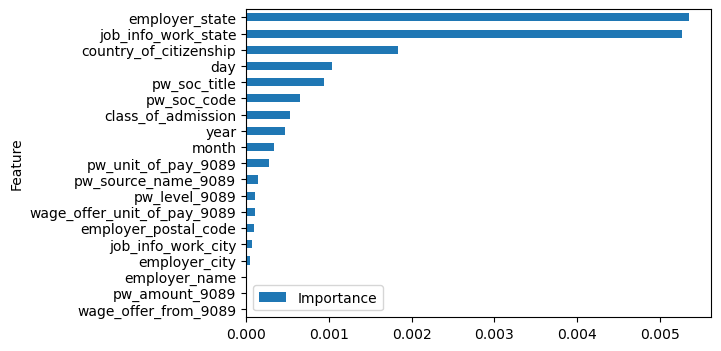

In [52]:
# Plotting features selection
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(6, 4))

In [57]:
# Evaluating the model
y_test_logreg = model.predict(X_test_enc)

In [58]:
# Evaluating predictions
accuracy = accuracy_score(y_test_enc, y_test_logreg)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 92.77


In [59]:
# Performing confusion matrix on the test 
cm = confusion_matrix(y_test_enc, y_test_logreg)
cm # Displaying the result

array([[109030,     15],
       [  8487,      4]], dtype=int64)

In [60]:
print(classification_report(y_test_enc, y_test_logreg))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    109045
           1       0.21      0.00      0.00      8491

    accuracy                           0.93    117536
   macro avg       0.57      0.50      0.48    117536
weighted avg       0.88      0.93      0.89    117536



#### XGBoost Model

In [61]:
# Preparing input data for XGBClassifier()
def prepare_inputs_oneHotEnc(X_train, X_test):
 ohe = OneHotEncoder(handle_unknown='ignore')
 ohe.fit(X_train)
 X_train_enc = ohe.transform(X_train)
 X_test_enc = ohe.transform(X_test)
 return X_train_enc, X_test_enc

In [62]:
# Preparing input data for using XGBoost model
X_train_enc, X_test_enc = prepare_inputs_oneHotEnc(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [63]:
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train_enc, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
# Predicting the Test set results
y_test_xgb = my_model.predict(X_test_enc)
# Evaluating predictions
accuracy_test = accuracy_score(y_test_enc, y_test_xgb)
print('Accuracy: %.2f' % (accuracy_test*100))    

Accuracy: 94.29


### Results

I used well-researched methodologies like Logistic Regression and Extreme Gradient Boosting (XGBoost) to make predictions. Upon evaluating the performance of the Logistic Regression and XGBoost models, the results are as follows: The accuracy of the logistic regression model is 92%. It means that the model can predict the classification of data with a 92% accuracy rate, which is quite impressive. Only 8% of observations are misclassified, making the model reliable and useful in practical applications. XGBoost, the most powerful technique for building predictive models, was a solid option because it attained 94% accuracy, which was significantly higher than the logistic regression model. 

For the “certified” visas, the precision is 0.95, indicating that 95% of visas predicted as certified are correct, and for “denied”, the precision is 0.74, meaning that 74% of the visas predicted as denied are correct. The recall for the “certified” is 0.99, indicating that the model correctly identifies 99% of the actual “certified” visas. For the “denied”, the recall is 0.31, meaning that the model captures only 31% of the actual “denied” visas. For the F1-score, “certified” is 0.97 indicating that the model identifies 97% of the actual “certified” visas, and for “denied”, the F1-score is 0.44, meaning that the model captures 44% of the actual “denied” visas.